**Question 4: Imagine you working as a sale manager now you need to predict the Revenue and whether that particular revenue is on the weekend or not and find the Informational_Duration using the Ensemble learning algorithm.**

**[Link](https://www.kaggle.com/datasets/henrysue/online-shoppers-intention)**

**Answer:**

I will use the following four ensemble learning algorithms:
1. Random Forest
2. AdaBoost
3. Gradient Boost
4. XGBoost

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import set_config
# set_config(transform_output="pandas")
from sklearn.preprocessing import (
    OrdinalEncoder,
    StandardScaler,
)
from feature_engine.encoding import OrdinalEncoder as fe_OrdinalEncoder
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
)

from imblearn.over_sampling import SMOTENC

# EDA

In [2]:
# Loading the data
df = pd.read_csv("Question_04_online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

No missing values.

## Encoding the targets, i.e., `Revenue` and `Weekend`

In [4]:
oe_revenue = OrdinalEncoder(
    categories=[
        [False, True]
    ]
)

oe_weekend = OrdinalEncoder(
    categories=[
        [False, True]
    ]
)

In [5]:
oe_revenue.fit(df[["Revenue"]])
oe_weekend.fit(df[["Weekend"]])

OrdinalEncoder(categories=[[False, True]])

In [6]:
df[["Revenue"]] = oe_revenue.transform(df[["Revenue"]])
df[["Weekend"]] = oe_weekend.transform(df[["Weekend"]])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Checking the imbalance ratio of the data

In [8]:
df["Weekend"].value_counts(normalize=True)

0.0    0.767397
1.0    0.232603
Name: Weekend, dtype: float64

In [9]:
df["Revenue"].value_counts(normalize=True)

0.0    0.845255
1.0    0.154745
Name: Revenue, dtype: float64

The data is quite imbalanced with respect to the targets `Weekend` and `Revenue`. I will use the SMOTE-NC oversampling technique to balance this out.

## Target = `Revenue`

In [10]:
X = df.iloc[:, :-1]
y = df[["Revenue"]]

### Train-test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [12]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
5396,4,250.000000,0,0.000000,11,418.000000,0.000000,0.014286,0.00000,0.0,May,2,2,1,2,New_Visitor,0.0
611,16,315.144986,6,147.866667,173,6255.017866,0.002531,0.010737,0.00000,0.0,Mar,2,2,2,2,Returning_Visitor,0.0
4474,0,0.000000,0,0.000000,10,257.000000,0.000000,0.010000,0.00000,0.0,May,2,5,2,2,Returning_Visitor,0.0
2114,2,30.000000,0,0.000000,10,121.000000,0.016667,0.025000,0.00000,0.0,May,3,6,3,3,New_Visitor,0.0
8957,9,739.125000,0,0.000000,19,1655.190476,0.000000,0.022667,27.97007,0.0,Dec,1,1,7,2,New_Visitor,0.0


In [13]:
y_train.head()

,Revenue
5396,0.0
611,0.0
4474,0.0
2114,0.0
8957,0.0


### Balancing the data

In [14]:
smote_nc = SMOTENC(
    sampling_strategy='auto', # samples only the minority class
    random_state=42,  # for reproducibility
    k_neighbors=5,
    n_jobs=-1,
    categorical_features=[10, 15] # indeces of the columns of categorical variables
)  

X_res, y_res = smote_nc.fit_resample(X_train, y_train)

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:576: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  FutureWarning,
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:340: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  FutureWarning,


In [15]:
X_res.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,4,250.000000,0,0.000000,11,418.000000,0.000000,0.014286,0.00000,0.0,May,2,2,1,2,New_Visitor,0.0
1,16,315.144986,6,147.866667,173,6255.017866,0.002531,0.010737,0.00000,0.0,Mar,2,2,2,2,Returning_Visitor,0.0
2,0,0.000000,0,0.000000,10,257.000000,0.000000,0.010000,0.00000,0.0,May,2,5,2,2,Returning_Visitor,0.0
3,2,30.000000,0,0.000000,10,121.000000,0.016667,0.025000,0.00000,0.0,May,3,6,3,3,New_Visitor,0.0
4,9,739.125000,0,0.000000,19,1655.190476,0.000000,0.022667,27.97007,0.0,Dec,1,1,7,2,New_Visitor,0.0


In [16]:
y_res.head()

,Revenue
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [17]:
y_train["Revenue"].value_counts(normalize=True)

0.0    0.84566
1.0    0.15434
Name: Revenue, dtype: float64

In [18]:
y_res["Revenue"].value_counts(normalize=True)

1.0    0.5
0.0    0.5
Name: Revenue, dtype: float64

In [19]:
X_train, y_train = X_res, y_res

In [20]:
X_train.to_csv("Question_04_revenue_X_train.csv", index=False)

In [21]:
y_train.to_csv("Question_04_revenue_y_train.csv", index=False)

In [14]:
set_config(transform_output="pandas")

In [15]:
X_train = pd.read_csv("Question_04_revenue_X_train.csv")
y_train = pd.read_csv("Question_04_revenue_y_train.csv")

In [16]:
num_features = [feature for feature in X_train.columns if X_train[feature].dtype != "O" and X_train[feature].dtype != bool]
num_features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend']

In [17]:
discrete_num_features = [feature for feature in num_features if X_train[feature].nunique() < 25]
discrete_num_features

['Informational', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

In [18]:
for feature in discrete_num_features:
    print(f"{feature}: {X_train[feature].unique()}, total {X_train[feature].nunique()} unique values\n")

Informational: [ 0  6  1  2  3  4 12  5  8  7  9 24 10 16 11], total 15 unique values

OperatingSystems: [2 3 1 4 8 6 5 7], total 8 unique values

Browser: [ 2  5  6  1  4  8  3 13 10 12  7 11  9], total 13 unique values

Region: [1 2 3 7 9 8 4 6 5], total 9 unique values

TrafficType: [ 2  3 13  4 20 10  1 11  6  5 19  9  8 15  7 14 18 12 17 16], total 20 unique values



In [19]:
continuous_num_features = [feature for feature in num_features if feature not in discrete_num_features]
continuous_num_features

['Administrative',
 'Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Weekend']

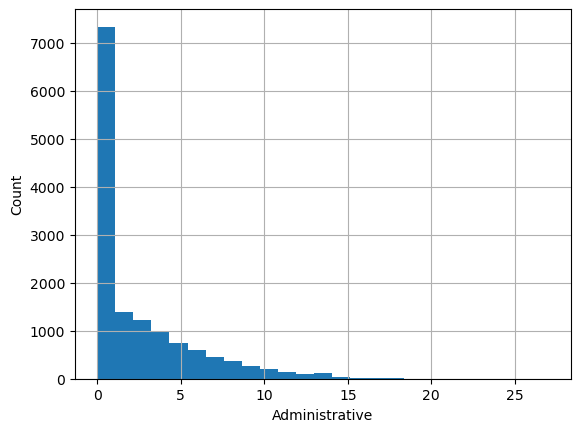

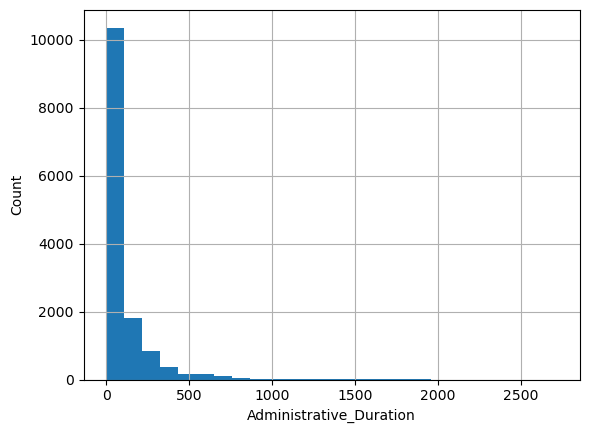

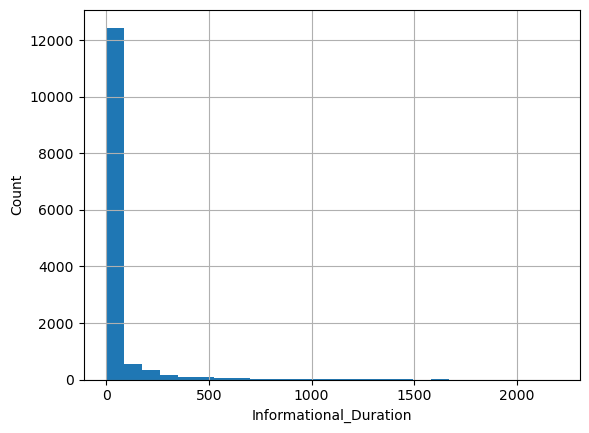

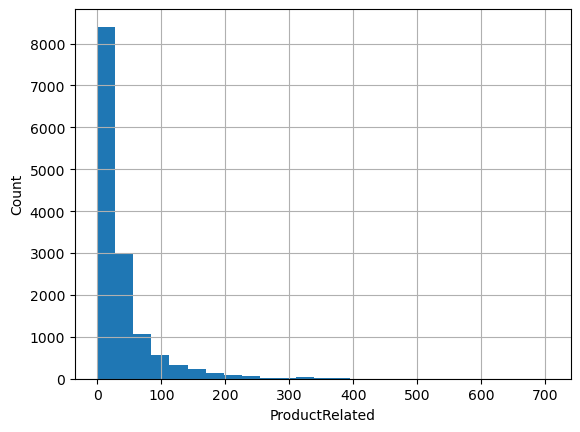

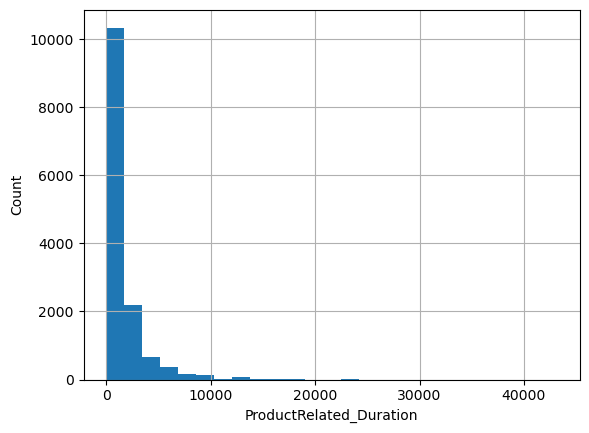

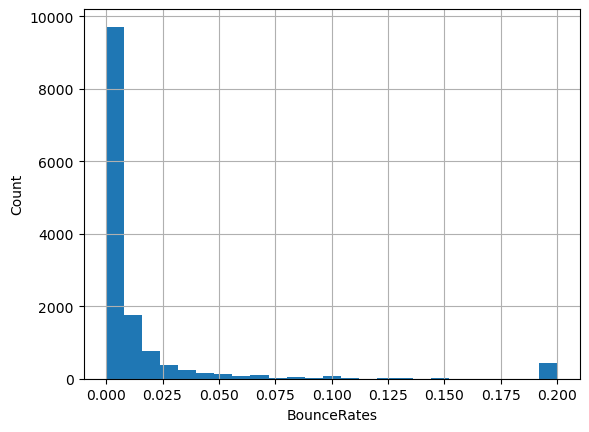

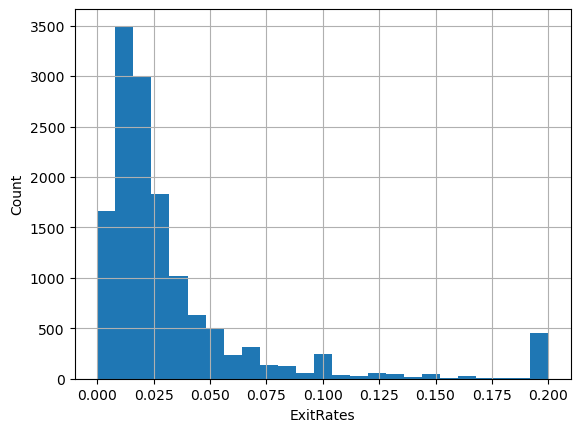

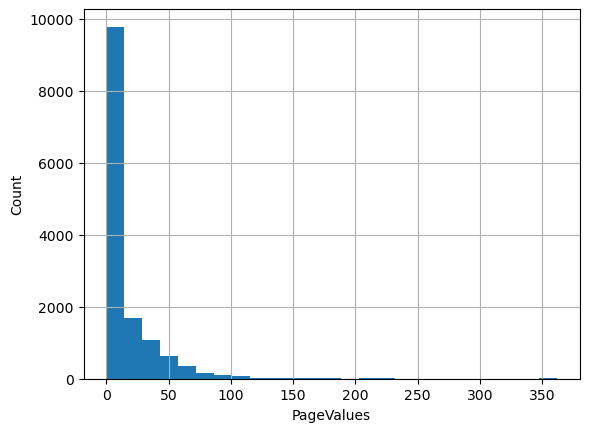

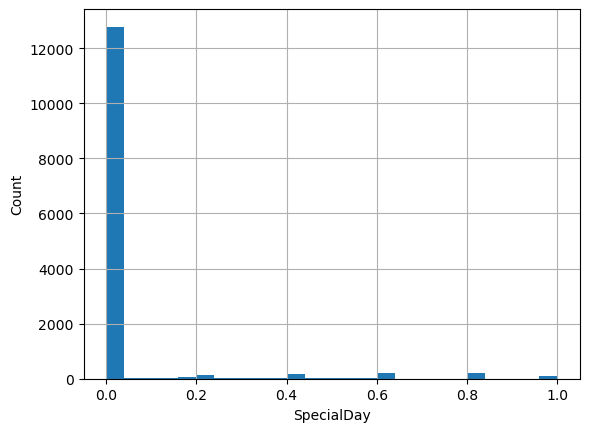

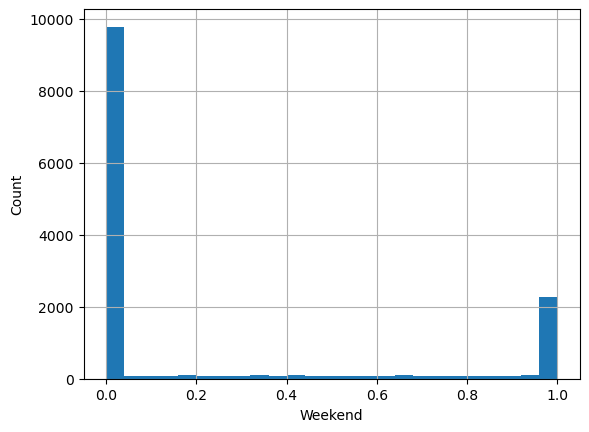

In [20]:
for feature in continuous_num_features:
    X_train[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

In [21]:
for feature in continuous_num_features:
    print(f"Zero is contained in `{feature}`: {0 in X_train[feature].unique()}")

Zero is contained in `Administrative`: True
Zero is contained in `Administrative_Duration`: True
Zero is contained in `Informational_Duration`: True
Zero is contained in `ProductRelated`: True
Zero is contained in `ProductRelated_Duration`: True
Zero is contained in `BounceRates`: True
Zero is contained in `ExitRates`: True
Zero is contained in `PageValues`: True
Zero is contained in `SpecialDay`: True
Zero is contained in `Weekend`: True


Many of these continuous variables have an extreme right skew. Let us see how the spread changes after taking log.

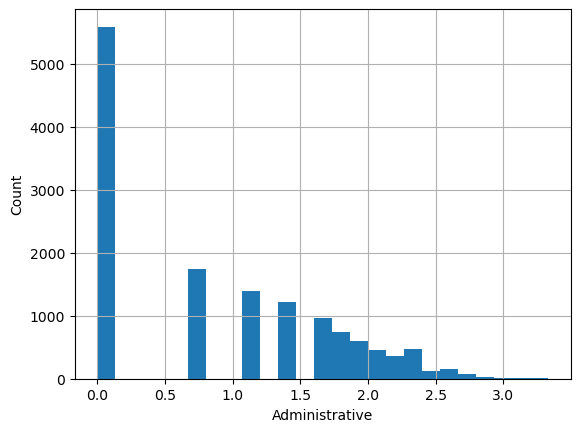

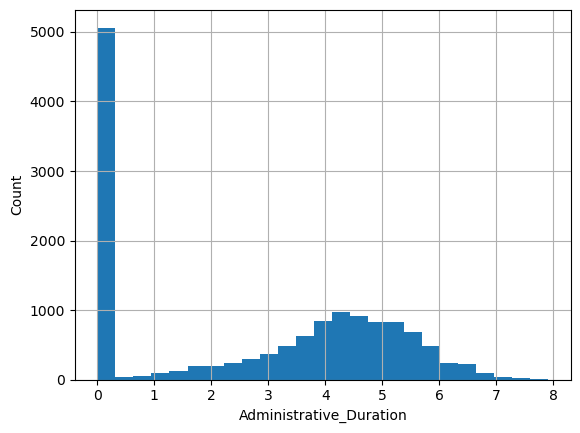

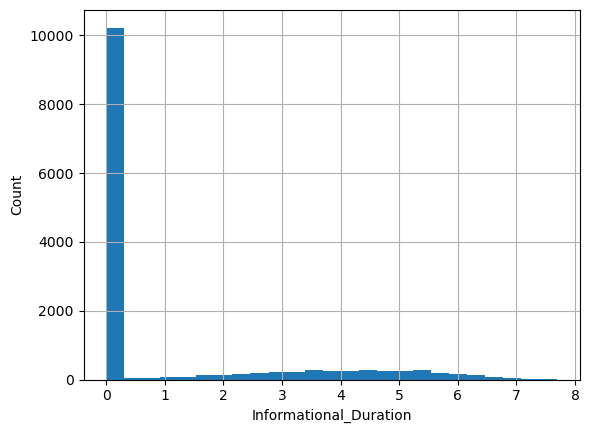

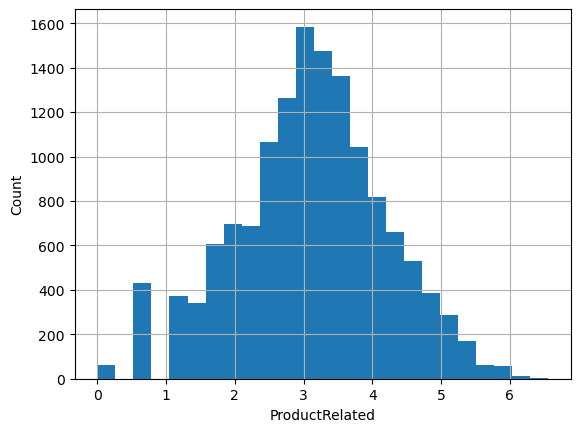

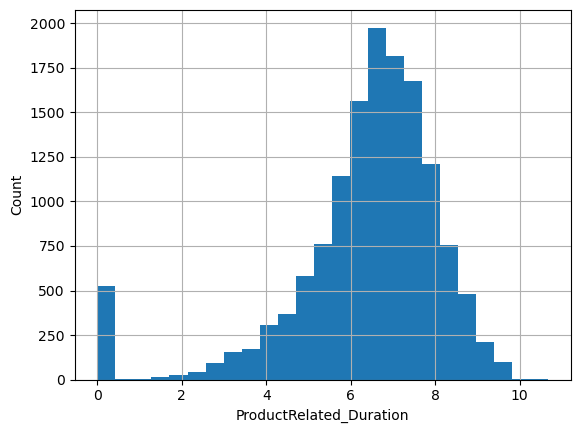

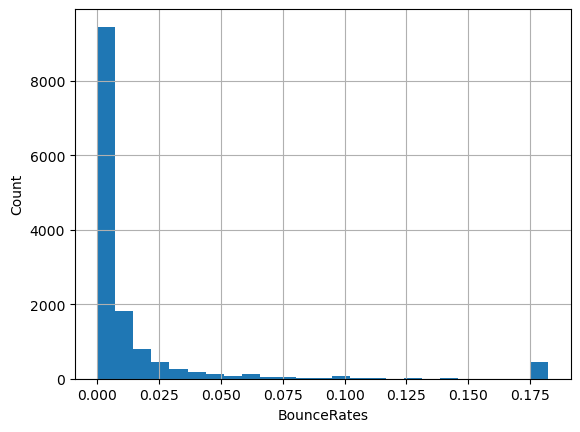

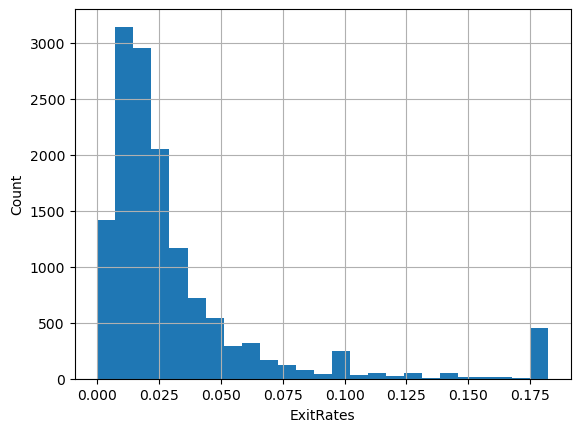

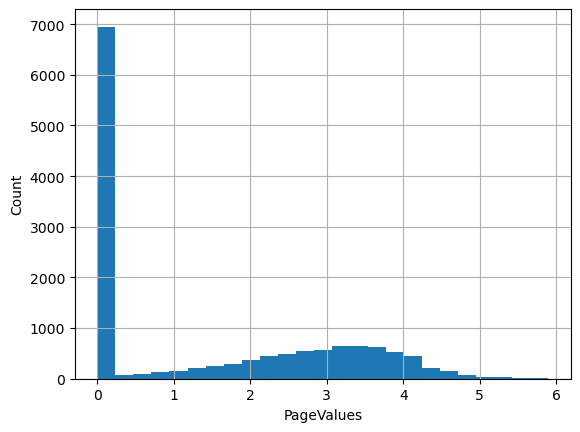

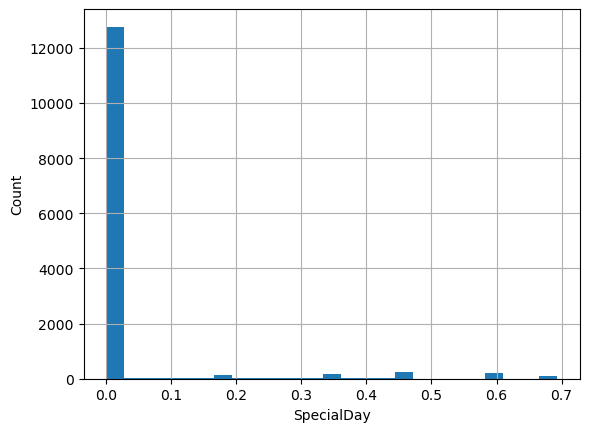

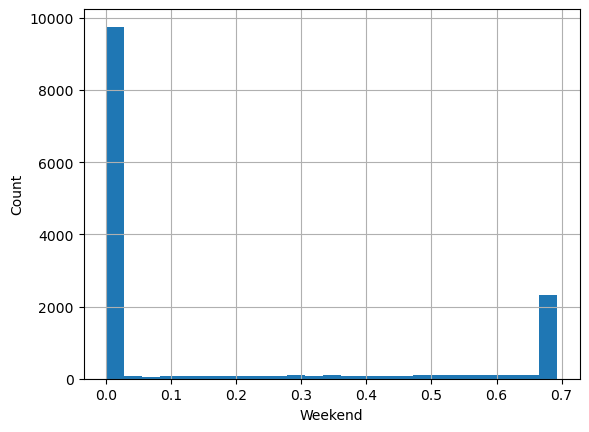

In [22]:
for feature in continuous_num_features:
    np.log(np.add(X_train[feature], 1)).hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

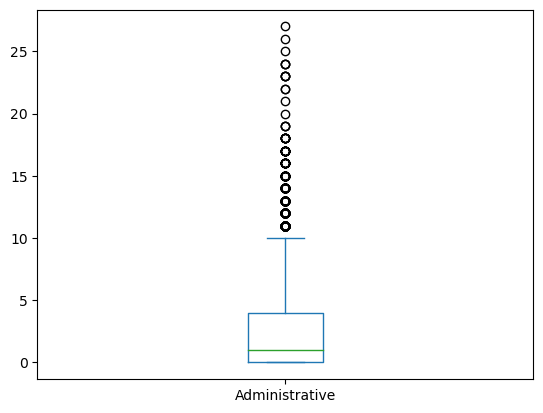

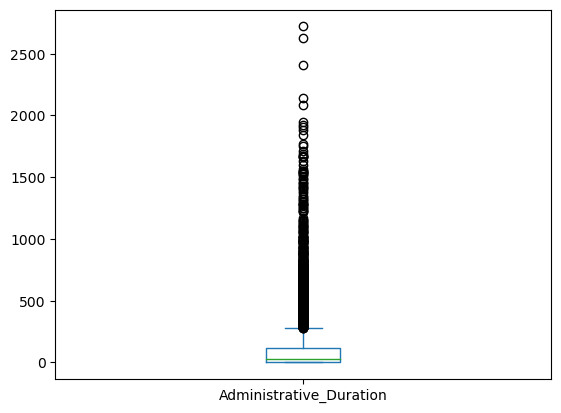

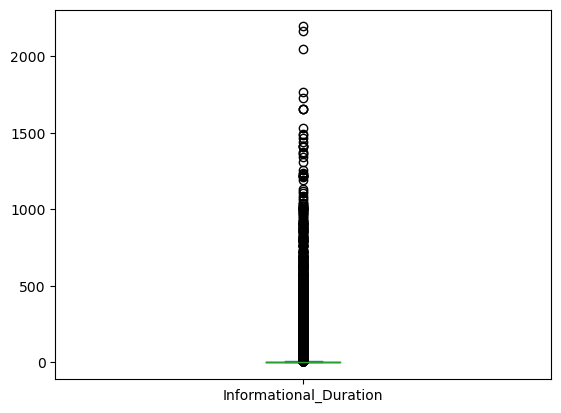

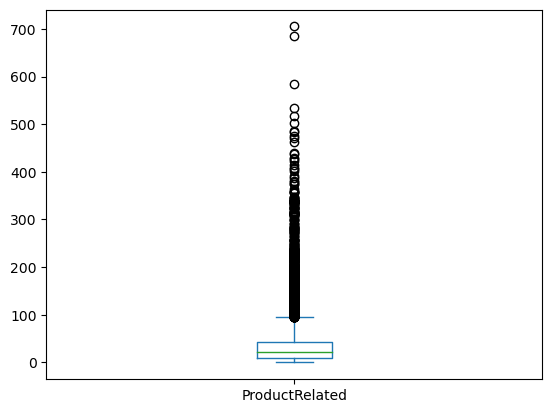

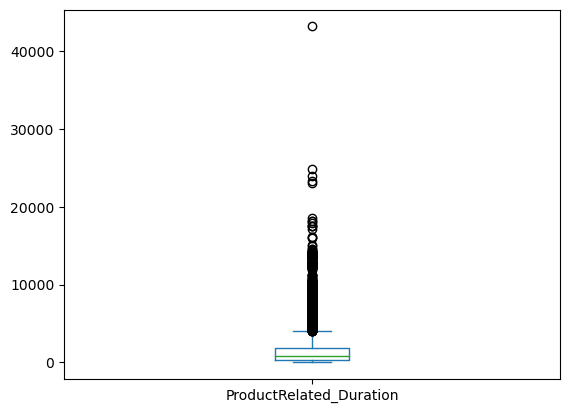

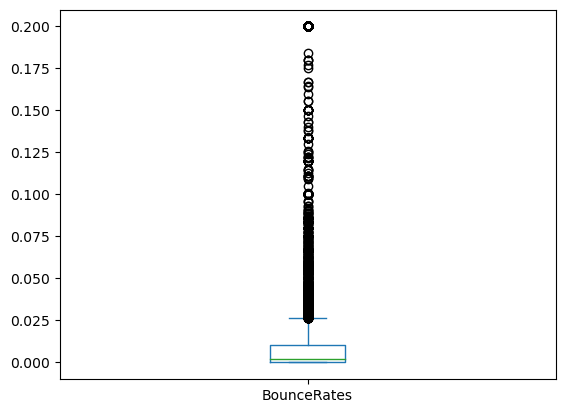

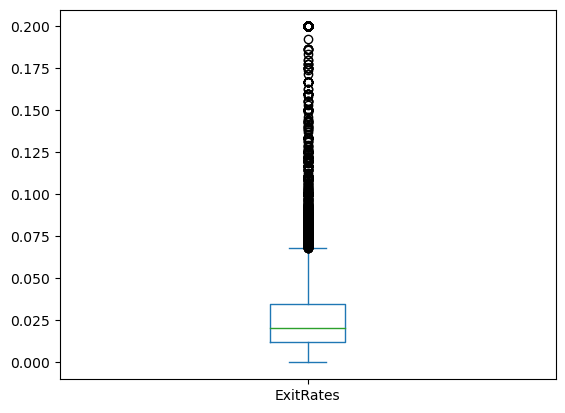

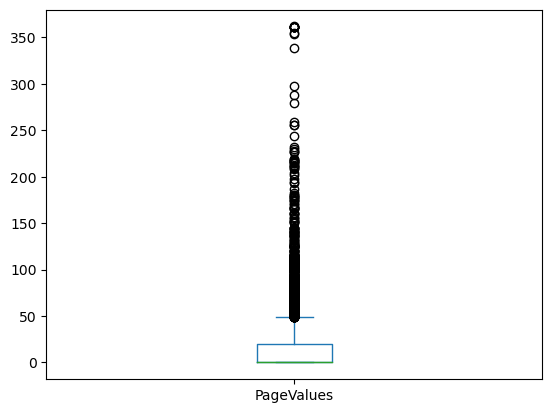

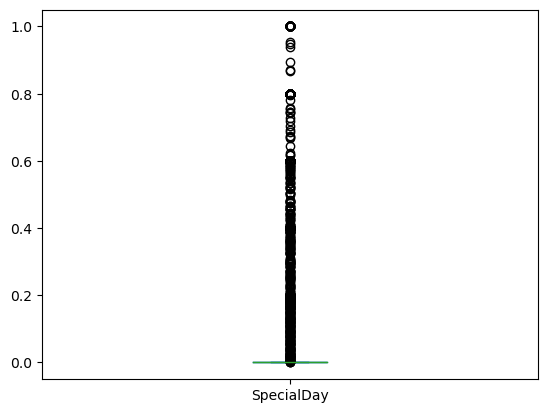

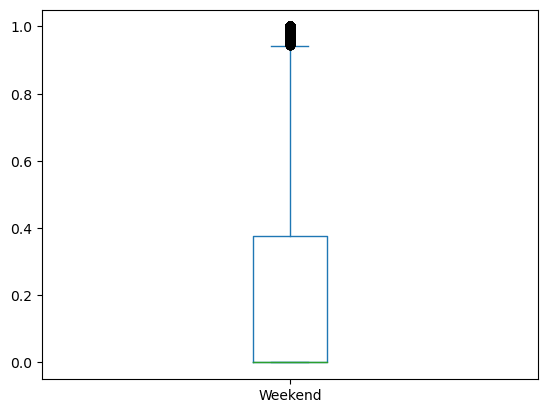

In [23]:
for feature in continuous_num_features:
    X_train[feature].plot(kind="box")
    plt.show()

Since random forest and gradient boost are robust to outliers, we will not apply any transformation on the data.

In [24]:
cat_features = [feature for feature in X_train.columns if feature not in num_features]
cat_features

['Month', 'VisitorType']

In [25]:
for feature in cat_features:
    print(f"{X_train[feature].value_counts(normalize=True)}\n")

Nov     0.352133
May     0.246636
Mar     0.123604
Dec     0.121457
Oct     0.040939
Sep     0.035571
Aug     0.029130
Jul     0.025193
June    0.017034
Feb     0.008302
Name: Month, dtype: float64

Returning_Visitor    0.867091
New_Visitor          0.128185
Other                0.004724
Name: VisitorType, dtype: float64



In [ ]:
# for feature in cat_features:
#     df.groupby(feature)['Weekend'].mean().plot.bar()
#     plt.ylabel(f"Median {'Weekend'}")
#     plt.show()

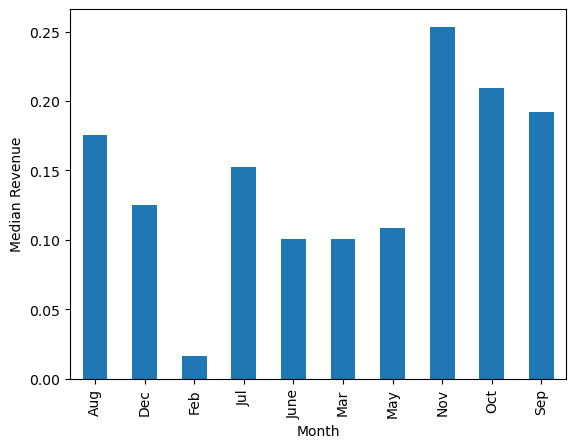

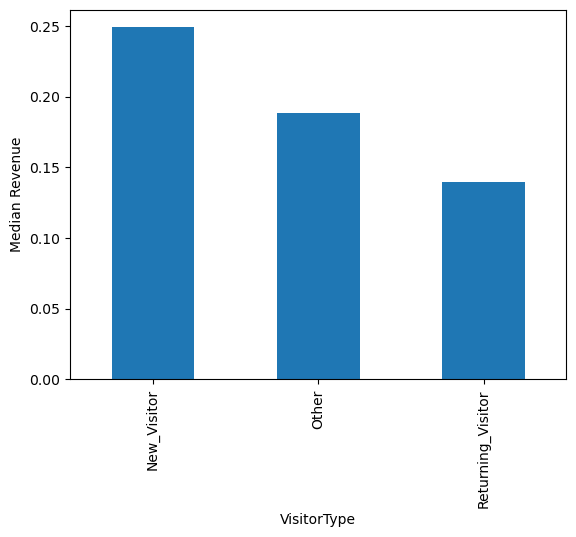

In [26]:
for feature in cat_features:
    df.groupby(feature)['Revenue'].mean().plot.bar()
    plt.ylabel(f"Median {'Revenue'}")
    plt.show()

We will use the ordered encoding for these categorical variables that establishes a monotonic relationship with the mean of the target.

## Feature Engineering

In [27]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,4,250.000000,0,0.000000,11,418.000000,0.000000,0.014286,0.00000,0.0,May,2,2,1,2,New_Visitor,0.0
1,16,315.144986,6,147.866667,173,6255.017866,0.002531,0.010737,0.00000,0.0,Mar,2,2,2,2,Returning_Visitor,0.0
2,0,0.000000,0,0.000000,10,257.000000,0.000000,0.010000,0.00000,0.0,May,2,5,2,2,Returning_Visitor,0.0
3,2,30.000000,0,0.000000,10,121.000000,0.016667,0.025000,0.00000,0.0,May,3,6,3,3,New_Visitor,0.0
4,9,739.125000,0,0.000000,19,1655.190476,0.000000,0.022667,27.97007,0.0,Dec,1,1,7,2,New_Visitor,0.0


In [28]:
for feature in cat_features:
    print(X_train[feature].unique())
    print("\n")

['May' 'Mar' 'Dec' 'Nov' 'Oct' 'Aug' 'June' 'Jul' 'Feb' 'Sep']


['New_Visitor' 'Returning_Visitor' 'Other']




## Building Pipeline

In [29]:
oe_monotonic = fe_OrdinalEncoder(
    encoding_method="ordered"
)

In [30]:
cat_encoding = ColumnTransformer(
    [
        ("OE", oe_monotonic, ["Month", "VisitorType"]),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

scaling = ColumnTransformer(
    [
        ("STD", StandardScaler(), X_train.columns),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

### Random Forest

In [31]:
pipeline = Pipeline(
    [
        ("Cat_Encoding", cat_encoding),
        ("Scaling", scaling),
        ("RandomForest", RandomForestClassifier())
    ]
)

In [32]:
pipeline.fit(X_train, y_train)

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv0\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv0\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('Cat_Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OE', OrdinalEncoder(),
                                                  ['Month', 'VisitorType'])],
                                   verbose_feature_names_out=False)),
                ('Scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('STD', StandardScaler(),
                                                  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RandomForest', RandomForestClassifier())])

In [33]:
pred = pipeline.predict(X_test)

In [34]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
cm

array([[3183,  253],
       [ 178,  455]], dtype=int64)

In [35]:
accuracy_score(y_true=y_test, y_pred=pred)

0.8940771688375522

In [36]:
balanced_accuracy_score(y_true=y_test, y_pred=pred)

0.82258361885215

In [37]:
precision_score(y_true=y_test, y_pred=pred)

0.6426553672316384

In [38]:
recall_score(y_true=y_test, y_pred=pred)

0.7187993680884676

In [39]:
f1_score(y_true=y_test, y_pred=pred)

0.6785980611483968

In [40]:
roc_auc_score(y_test, pred)

0.82258361885215

### Gradient Boost

In [41]:
pipeline = Pipeline(
    [
        ("Cat_Encoding", cat_encoding),
        ("Scaling", scaling),
        ("GradientBoost", GradientBoostingClassifier())
    ]
)

In [42]:
pipeline.fit(X_train, y_train)

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv0\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv0\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('Cat_Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OE', OrdinalEncoder(),
                                                  ['Month', 'VisitorType'])],
                                   verbose_feature_names_out=False)),
                ('Scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('STD', StandardScaler(),
                                                  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('GradientBoost', GradientBoostingClassifier())])

In [43]:
pred = pipeline.predict(X_test)

In [44]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
cm

array([[3155,  281],
       [ 161,  472]], dtype=int64)

In [45]:
accuracy_score(y_true=y_test, y_pred=pred)

0.8913738019169329

In [46]:
balanced_accuracy_score(y_true=y_test, y_pred=pred)

0.8319372336766915

In [47]:
precision_score(y_true=y_test, y_pred=pred)

0.6268260292164675

In [48]:
recall_score(y_true=y_test, y_pred=pred)

0.7456556082148499

In [49]:
f1_score(y_true=y_test, y_pred=pred)

0.6810966810966811

In [50]:
roc_auc_score(y_test, pred)

0.8319372336766915

## Target = `Weekend`

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import set_config
# set_config(transform_output="pandas")
from sklearn.preprocessing import (
    OrdinalEncoder,
    StandardScaler,
)
from feature_engine.encoding import OrdinalEncoder as fe_OrdinalEncoder
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
)

from imblearn.over_sampling import SMOTENC

In [2]:
df = pd.read_csv("Question_04_online_shoppers_intention.csv")

In [3]:
oe_revenue = OrdinalEncoder(
    categories=[
        [False, True]
    ]
)

oe_weekend = OrdinalEncoder(
    categories=[
        [False, True]
    ]
)

In [4]:
oe_revenue.fit(df[["Revenue"]])
oe_weekend.fit(df[["Weekend"]])

OrdinalEncoder(categories=[[False, True]])

In [5]:
df[["Revenue"]] = oe_revenue.transform(df[["Revenue"]])
df[["Weekend"]] = oe_weekend.transform(df[["Weekend"]])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1.0,0.0


In [6]:
df["Weekend"].value_counts(normalize=True)

0.0    0.767397
1.0    0.232603
Name: Weekend, dtype: float64

In [7]:
X = df.drop(["Weekend"], axis=1)
y = df[["Weekend"]]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [9]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Revenue
5396,4,250.000000,0,0.000000,11,418.000000,0.000000,0.014286,0.00000,0.0,May,2,2,1,2,New_Visitor,0.0
611,16,315.144986,6,147.866667,173,6255.017866,0.002531,0.010737,0.00000,0.0,Mar,2,2,2,2,Returning_Visitor,0.0
4474,0,0.000000,0,0.000000,10,257.000000,0.000000,0.010000,0.00000,0.0,May,2,5,2,2,Returning_Visitor,0.0
2114,2,30.000000,0,0.000000,10,121.000000,0.016667,0.025000,0.00000,0.0,May,3,6,3,3,New_Visitor,0.0
8957,9,739.125000,0,0.000000,19,1655.190476,0.000000,0.022667,27.97007,0.0,Dec,1,1,7,2,New_Visitor,0.0


In [10]:
y_train.head()

,Weekend
5396,0.0
611,0.0
4474,0.0
2114,0.0
8957,0.0


In [13]:
smote_nc = SMOTENC(
    sampling_strategy='auto', # samples only the minority class
    random_state=42,  # for reproducibility
    k_neighbors=5,
    n_jobs=-1,
    categorical_features=[10, 15] # indeces of the columns of categorical variables
)  

X_res, y_res = smote_nc.fit_resample(X_train, y_train)

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:576: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  FutureWarning,
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:340: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  FutureWarning,


In [14]:
X_res.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Revenue
0,4,250.000000,0,0.000000,11,418.000000,0.000000,0.014286,0.00000,0.0,May,2,2,1,2,New_Visitor,0.0
1,16,315.144986,6,147.866667,173,6255.017866,0.002531,0.010737,0.00000,0.0,Mar,2,2,2,2,Returning_Visitor,0.0
2,0,0.000000,0,0.000000,10,257.000000,0.000000,0.010000,0.00000,0.0,May,2,5,2,2,Returning_Visitor,0.0
3,2,30.000000,0,0.000000,10,121.000000,0.016667,0.025000,0.00000,0.0,May,3,6,3,3,New_Visitor,0.0
4,9,739.125000,0,0.000000,19,1655.190476,0.000000,0.022667,27.97007,0.0,Dec,1,1,7,2,New_Visitor,0.0


In [15]:
y_res.head()

,Weekend
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [16]:
y_train["Weekend"].value_counts(normalize=True)

0.0    0.772061
1.0    0.227939
Name: Weekend, dtype: float64

In [17]:
y_res["Weekend"].value_counts(normalize=True)

1.0    0.5
0.0    0.5
Name: Weekend, dtype: float64

In [18]:
X_train, y_train = X_res, y_res

In [19]:
X_train.to_csv("Question_04_weekend_X_train.csv", index=False)
y_train.to_csv("Question_04_weekend_y_train.csv", index=False)

In [11]:
set_config(transform_output="pandas")

In [12]:
X_train = pd.read_csv("Question_04_weekend_X_train.csv")
y_train = pd.read_csv("Question_04_weekend_y_train.csv")

In [13]:
oe_monotonic = fe_OrdinalEncoder(
    encoding_method="ordered"
)

In [14]:
cat_encoding = ColumnTransformer(
    [
        ("OE", oe_monotonic, ["Month", "VisitorType"]),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

scaling = ColumnTransformer(
    [
        ("STD", StandardScaler(), X_train.columns),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

### Random Forest

In [15]:
pipeline = Pipeline(
    [
        ("Cat_Encoding", cat_encoding),
        ("Scaling", scaling),
        ("RandomForest", RandomForestClassifier())
    ]
)

In [16]:
pipeline.fit(X_train, y_train)

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv0\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv0\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('Cat_Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OE', OrdinalEncoder(),
                                                  ['Month', 'VisitorType'])],
                                   verbose_feature_names_out=False)),
                ('Scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('STD', StandardScaler(),
                                                  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Revenue'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RandomForest', RandomForestClassifier())])

In [17]:
pred = pipeline.predict(X_test)

In [18]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
cm

array([[2576,  508],
       [ 712,  273]], dtype=int64)

In [19]:
accuracy_score(y_true=y_test, y_pred=pred)

0.700172032440403

In [20]:
balanced_accuracy_score(y_true=y_test, y_pred=pred)

0.5562181095156268

In [21]:
precision_score(y_true=y_test, y_pred=pred)

0.3495518565941101

In [22]:
recall_score(y_true=y_test, y_pred=pred)

0.27715736040609135

In [23]:
f1_score(y_true=y_test, y_pred=pred)

0.3091732729331823

In [24]:
roc_auc_score(y_test, pred)

0.5562181095156268

### Gradient Boost

In [25]:
pipeline = Pipeline(
    [
        ("Cat_Encoding", cat_encoding),
        ("Scaling", scaling),
        ("GradientBoost", GradientBoostingClassifier())
    ]
)

In [26]:
pipeline.fit(X_train, y_train)

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv0\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv0\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('Cat_Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OE', OrdinalEncoder(),
                                                  ['Month', 'VisitorType'])],
                                   verbose_feature_names_out=False)),
                ('Scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('STD', StandardScaler(),
                                                  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Revenue'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('GradientBoost', GradientBoostingClassifier())])

In [27]:
pred = pipeline.predict(X_test)

In [28]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
cm

array([[2503,  581],
       [ 657,  328]], dtype=int64)

In [29]:
accuracy_score(y_true=y_test, y_pred=pred)

0.6957483411157532

In [30]:
balanced_accuracy_score(y_true=y_test, y_pred=pred)

0.5723016123828899

In [31]:
precision_score(y_true=y_test, y_pred=pred)

0.36083608360836084

In [32]:
recall_score(y_true=y_test, y_pred=pred)

0.332994923857868

In [33]:
f1_score(y_true=y_test, y_pred=pred)

0.34635691657866946

In [34]:
roc_auc_score(y_test, pred)

0.5723016123828899

## Target = `Informational_Duration`

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.preprocessing import (
    OrdinalEncoder,
    OneHotEncoder,
    StandardScaler,
)
from feature_engine.encoding import OrdinalEncoder as fe_OrdinalEncoder
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    r2_score
)

# from imblearn.over_sampling import SMOTENC

In [2]:
df = pd.read_csv("Question_04_online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
oe_revenue = OrdinalEncoder(
    categories=[
        [False, True]
    ]
)

oe_weekend = OrdinalEncoder(
    categories=[
        [False, True]
    ]
)

In [6]:
oe_revenue.fit(df[["Revenue"]])
oe_weekend.fit(df[["Weekend"]])

OrdinalEncoder(categories=[[False, True]])

In [7]:
df[["Revenue"]] = oe_revenue.transform(df[["Revenue"]])
df[["Weekend"]] = oe_weekend.transform(df[["Weekend"]])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1.0,0.0


In [8]:
X = df.drop(["Informational_Duration"], axis=1)
y = df[["Informational_Duration"]]

In [9]:
X.head()

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0.0,0.0
1,0,0.0,0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0.0,0.0
2,0,0.0,0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0.0,0.0
3,0,0.0,0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0.0,0.0
4,0,0.0,0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1.0,0.0


In [10]:
y.head()

,Informational_Duration
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [12]:
X_train.head()

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5396,4,250.000000,0,11,418.000000,0.000000,0.014286,0.00000,0.0,May,2,2,1,2,New_Visitor,0.0,0.0
611,16,315.144986,6,173,6255.017866,0.002531,0.010737,0.00000,0.0,Mar,2,2,2,2,Returning_Visitor,0.0,0.0
4474,0,0.000000,0,10,257.000000,0.000000,0.010000,0.00000,0.0,May,2,5,2,2,Returning_Visitor,0.0,0.0
2114,2,30.000000,0,10,121.000000,0.016667,0.025000,0.00000,0.0,May,3,6,3,3,New_Visitor,0.0,0.0
8957,9,739.125000,0,19,1655.190476,0.000000,0.022667,27.97007,0.0,Dec,1,1,7,2,New_Visitor,0.0,0.0


In [13]:
y_train.head()

,Informational_Duration
5396,0.000000
611,147.866667
4474,0.000000
2114,0.000000
8957,0.000000


In [14]:
num_features = [feature for feature in X_train.columns if X_train[feature].dtype != "O"]
num_features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend',
 'Revenue']

In [15]:
discrete_num_features = [feature for feature in num_features if X_train[feature].nunique() < 25]
discrete_num_features

['Informational',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend',
 'Revenue']

In [16]:
for feature in discrete_num_features:
    print(f"{feature}: {X_train[feature].unique()}, total {X_train[feature].nunique()} unique values\n")

Informational: [ 0  6  1  2  3  4 12  5  8  7  9 24 10 16], total 14 unique values

SpecialDay: [0.  0.8 1.  0.4 0.6 0.2], total 6 unique values

OperatingSystems: [2 3 1 4 8 6 5 7], total 8 unique values

Browser: [ 2  5  6  1  4  8  3 13 10 12  7 11  9], total 13 unique values

Region: [1 2 3 7 9 8 4 6 5], total 9 unique values

TrafficType: [ 2  3 13  4 20 10  1 11  6  5 19  9  8 15  7 14 18 12 17 16], total 20 unique values

Weekend: [0. 1.], total 2 unique values

Revenue: [0. 1.], total 2 unique values



In [17]:
continuous_num_features = [feature for feature in num_features if feature not in discrete_num_features]
continuous_num_features

['Administrative',
 'Administrative_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [18]:
cat_features = [feature for feature in X_train.columns if feature not in num_features]
cat_features

['Month', 'VisitorType']

In [19]:
for feature in cat_features:
    print(f"{X_train[feature].value_counts(normalize=True)}\n")

May     0.267522
Nov     0.245370
Mar     0.155429
Dec     0.141508
Oct     0.044305
Sep     0.036436
Aug     0.035710
Jul     0.035105
June    0.024573
Feb     0.014042
Name: Month, dtype: float64

Returning_Visitor    0.854981
New_Visitor          0.137877
Other                0.007142
Name: VisitorType, dtype: float64



### Building Pipeline

In [20]:
oe_monotonic = fe_OrdinalEncoder(
    encoding_method="ordered"
)

# ohe = OneHotEncoder(
#     categories="auto",
#     drop="first",
#     sparse_output=False,
#     handle_unknown="error",
# )

In [21]:
cat_encoding = ColumnTransformer(
    [
        ("OE", oe_monotonic, ["Month", "VisitorType"]),
        # ("OHE", ohe, ["Weekend", "Revenue"]),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

scaling = ColumnTransformer(
    [
        ("STD", StandardScaler(), X_train.columns),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

### Random Forest

In [22]:
pipeline = Pipeline(
    [
        ("Cat_Encoding", cat_encoding),
        ("Scaling", scaling),
        ("RandomForest", RandomForestRegressor())
    ]
)

In [23]:
pipeline.fit(X_train, y_train)

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv0\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv0\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('Cat_Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OE', OrdinalEncoder(),
                                                  ['Month', 'VisitorType'])],
                                   verbose_feature_names_out=False)),
                ('Scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('STD', StandardScaler(),
                                                  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RandomForest', RandomForestRegressor())])

In [24]:
pred = pipeline.predict(X_test)

In [25]:
r2_score(y_true=y_test, y_pred=pred)

0.31996924545374383

## Gradient Boost

In [26]:
pipeline = Pipeline(
    [
        ("Cat_Encoding", cat_encoding),
        ("Scaling", scaling),
        ("GradientBoost", GradientBoostingRegressor())
    ]
)

In [27]:
pipeline.fit(X_train, y_train)

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv0\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv0\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('Cat_Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OE', OrdinalEncoder(),
                                                  ['Month', 'VisitorType'])],
                                   verbose_feature_names_out=False)),
                ('Scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('STD', StandardScaler(),
                                                  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('GradientBoost', GradientBoostingRegressor())])

In [28]:
pred = pipeline.predict(X_test)

In [29]:
r2_score(y_true=y_test, y_pred=pred)

0.35914202942506457